In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.insert(0,'/content/gdrive/MyDrive/TestProgram-Recovery')

import lbciot as cipher
import pandas as pd
import train_nets as tn

rounds = 6;
epoch = 40;
diff1 = 0x0200;
diff2 = 0x0000;

name = str(diff1)+"_"+str(diff2)+"_r="+str(rounds)+"_epoch="+str(epoch);

model, h =tn.train_distinguisher(epoch,(diff1,diff2),num_rounds=rounds,depth=10);

model.save('/content/gdrive/MyDrive/TestProgram-Recovery/'+name);

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
(512, 0)
(512, 0)
Epoch 1/40
200/200 [==============================] - 51s 221ms/step - loss: 0.2128 - acc: 0.6667 - val_loss: 0.2642 - val_acc: 0.5282 - lr: 0.0020
Epoch 2/40
200/200 [==============================] - 43s 217ms/step - loss: 0.1664 - acc: 0.7611 - val_loss: 0.1676 - val_acc: 0.7598 - lr: 0.0018
Epoch 3/40
182/200 [==========================>...] - ETA: 3s - loss: 0.1451 - acc: 0.7986

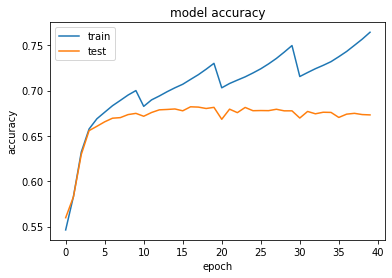

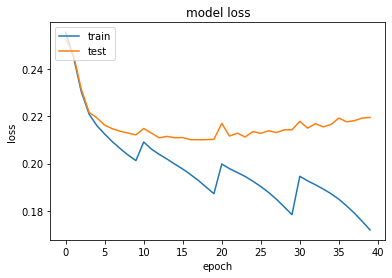

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/gdrive/MyDrive/TestProgram-SLIM/Plots/'+name+'_accuracy.png')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/gdrive/MyDrive/TestProgram-SLIM/Plots/'+name+'_loss.png')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.insert(0,'/content/gdrive/MyDrive/TestProgram-Recovery')

import lbciot as cipher
import pandas as pd
import train_nets as tn

samples = 500;
rounds = 8;
X,Y = cipher.make_train_data(samples,rounds,(0x0002,0x0000));
print(X)
print(Y)

data = {'ct0l_1':  X[:,0],  'ct0l_2':  X[:,1],  'ct0l_3':  X[:,2],'ct0l_4':  X[:,3],'ct0l_5':  X[:,4],'ct0l_6':  X[:,5],'ct0l_7':  X[:,6],'ct0l_8':  X[:,7], \
        'ct0l_9':  X[:,8],  'ct0l_10':  X[:,9], 'ct0l_11':  X[:,10],'ct0l_12':  X[:,11],'ct0l_13':  X[:,12],'ct0l_14':  X[:,13],'ct0l_15':  X[:,14],'ct0l_16':  X[:,15],\
        'ct0r_1':  X[:,16], 'ct0r_2':  X[:,17],  'ct0r_3':  X[:,18],  'ct0r_4':  X[:,19],   'ct0r_5':  X[:,20],   'ct0r_6':  X[:,21],    'ct0r_7':  X[:,22],   'ct0r_8':  X[:,23], \
        'ct0r_9':  X[:,24], 'ct0r_10':  X[:,25], 'ct0r_11':  X[:,26], 'ct0r_12':  X[:,27],  'ct0r_13':  X[:,28],  'ct0r_14':  X[:,29],  'ct0r_15':  X[:,30],  'ct0r_16':  X[:,31],\
        'ct1l_1':  X[:,32], 'ct1l_2':  X[:,33],  'ct1l_3':  X[:,34],  'ct1l_4':  X[:,35],   'ct1l_5':  X[:,36],   'ct1l_6':  X[:,37],    'ct1l_7':  X[:,38],   'ct1l_8':  X[:,39], \
        'ct1l_9':  X[:,40], 'ct1l_10':  X[:,41], 'ct1l_11':  X[:,42], 'ct1l_12':  X[:,43],  'ct1l_13':  X[:,44],  'ct1l_14':  X[:,45],  'ct1l_15':  X[:,46],  'ct1l_16':  X[:,47],\
        'ct1r_1':  X[:,48], 'ct1r_2':  X[:,49],  'ct1r_3':  X[:,50],  'ct1r_4':  X[:,51],   'ct1r_5':  X[:,52],   'ct1r_6':  X[:,53],    'ct1r_7':  X[:,54],   'ct1r_8':  X[:,55], \
        'ct1r_9':  X[:,56], 'ct1r_10':  X[:,57], 'ct1r_11':  X[:,58], 'ct1r_12':  X[:,59],  'ct1r_13':  X[:,60],  'ct1r_14':  X[:,61],  'ct1r_15':  X[:,62],  'ct1r_16':  X[:,63],
        'notrand': Y};

df = pd.DataFrame(data);
df.to_csv('/content/gdrive/MyDrive/TestProgram-Recovery/'+str(samples)+'_rounds'+str(rounds)+'.csv');

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
(2, 0)
[[0 1 0 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 0 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 0]
 [1 1 0 ... 1 1 1]]
[1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0
 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0
 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.insert(0,'/content/gdrive/MyDrive/TestProgram-Recovery')

import numpy as np
from os import urandom
import lbciot as cipher
import pandas as pd
import train_nets as tn

n = 200; #number of plaintext pairs

rounds = 6;
epoch = 40;
diff1 = 0x0200;
diff2 = 0x0000;

key = np.frombuffer(urandom(10),dtype=np.uint16).reshape(5,-1);
keys = np.frombuffer(urandom(10*n),dtype=np.uint16).reshape(5,-1)*0+1 ;


for i in range(0,n):
  for j in range(0,5):
    keys[j][i]=key[j];


pt0l = np.frombuffer(urandom(2*n),dtype=np.uint16);
pt0r = np.frombuffer(urandom(2*n),dtype=np.uint16);

p0l = np.copy(pt0l); 
p0r = np.copy(pt0r);

p1l = p0l^diff1;
p1r = p0r^diff2;

ks = cipher.expand_key(keys, rounds + 1);

c0l,c0r = cipher.encrypt((p0l,p0r),ks);
c1l,c1r = cipher.encrypt((p1l,p1r),ks);



from tensorflow import keras

name = str(diff1)+"_"+str(diff2)+"_r="+str(rounds)+"_epoch="+str(epoch);
model = keras.models.load_model('/content/gdrive/MyDrive/TestProgram-Recovery/'+name);

allkeys = ks[rounds]*0;

count = np.zeros(2**16,dtype=int);

for i in range(0,2**16):
  if i%10000==0:
    print(i);
  c0l_dec1,c0r_dec1 = cipher.dec_one_round((c0l,c0r),allkeys);
  c1l_dec1,c1r_dec1 = cipher.dec_one_round((c1l,c1r),allkeys);
  X = cipher.convert_to_binary([c0l_dec1,c0r_dec1,c1l_dec1,c1r_dec1]);
  Z = model.predict(X,batch_size=10000);
  count[allkeys[0]] =  np.sum(Z>0.5);
  allkeys = allkeys + 1;

df = pd.DataFrame(count);
df.to_csv('/content/gdrive/MyDrive/TestProgram-Recovery/'+'count_'+str(diff1)+'_'+str(diff2)+'.csv');

import matplotlib.pyplot as plt

plt.hist(count, bins=100)
plt.savefig('/content/gdrive/MyDrive/TestProgram-Recovery/'+name+'_counthist.png')
plt.show()


count[np.argmax(count)]
print('found max:'+str(np.argmax(count)))
print('correct key:'+str(ks[rounds][0]));
count[41855]
sorted_count = -np.sort(-count);
temp = count;
top = 30;
rank = np.zeros((top,2),dtype=int);
for i in range(0,top):
  max_index = np.argmax(temp);
  rank[i][0] = max_index;
  rank[i][1] = temp[max_index];
  temp[max_index]=-1;

print(rank);

  



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
0


KeyboardInterrupt: ignored

In [ ]:
count[np.argmax(count)]
print('found max:'+str(np.argmax(count)))
print('correct key:'+str(ks[rounds][0]));
count[41855]
sorted_count = -np.sort(-count);
temp = count;
top = 10;
rank = np.zeros((top,2),dtype=int);
for i in range(0,top):
  max_index = np.argmax(temp);
  rank[i][0] = max_index;
  rank[i][1] = temp[max_index];
  temp[max_index]=-1;

print(rank);